### Edge Detection

We use Prewitt kernel in x direction and y direction to highlight the edges and find the shape in the images.

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.filters import prewitt_h, prewitt_v, prewitt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def edges_prewitt(image):

    # calculate horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(image)
    # calculate vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(image)
    
    edges_prewitt = prewitt(image)
    
    return (edges_prewitt_horizontal, edges_prewitt_vertical)

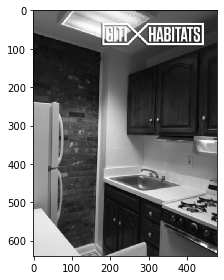

In [3]:
image_path = 'images_sample/images_sample/6812266/6812266_644f7c5ab1c382547e07043751a6df87.jpg'
image = imread(image_path, as_gray=True)
imshow(image)

In [4]:
# use Prewitt Kernel to find edges. Result in 2-dimentional table, where
# each value represent a pixel.
edges_prewitt_horizontal, edges_prewitt_vertical = edges_prewitt(image)
edges_vertical = pd.DataFrame(edges_prewitt_vertical)
edges_vertical

,0,1,2,3,4,5,6,7,8,9,...,469,470,471,472,473,474,475,476,477,478
0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.003922,0.002614,0.002614,2.614379e-03,0.001307,0.000000,0.000000,0.000000,-0.000747,...,0.003922,-0.002614,-0.007843,-0.006536,-0.001307,0.002614,-0.001307,-0.005229,0.000000,0.0
2,0.0,0.003922,0.003922,0.003922,3.921569e-03,0.001307,0.000000,0.000000,0.000000,-0.001493,...,0.005229,-0.002614,-0.006536,-0.002614,-0.003922,-0.003922,0.000000,0.002614,0.002614,0.0
3,0.0,0.002614,0.003922,0.003922,2.614379e-03,0.000000,-0.001307,0.001307,0.001307,-0.002240,...,0.003922,-0.002614,-0.005229,0.000000,-0.005229,-0.010458,-0.001307,0.006536,0.003922,0.0
4,0.0,0.001307,0.002614,0.002614,2.775558e-17,-0.002614,-0.001307,0.002614,0.002614,-0.002240,...,0.001307,-0.003922,-0.003922,0.000000,-0.006536,-0.011765,-0.003922,0.005229,0.003922,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.002240,...,0.003012,-0.004080,-0.008478,-0.005965,-0.007922,-0.024450,-0.035279,-0.038826,-0.036314,0.0
636,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.002240,...,0.004219,-0.003996,-0.003998,0.000945,0.001602,-0.009696,-0.014925,-0.022393,-0.033605,0.0
637,0.0,0.000000,0.000000,0.000380,3.796078e-04,-0.000380,-0.000380,0.000380,0.000380,-0.002240,...,-0.000087,-0.006243,-0.004375,-0.001761,0.001883,-0.001667,-0.000359,-0.003346,-0.014647,0.0
638,0.0,0.000000,0.000000,0.000759,7.592157e-04,-0.000759,-0.000759,0.000759,0.000759,-0.002240,...,-0.002145,-0.008024,-0.005871,-0.003534,0.000199,-0.000831,0.001506,0.003842,0.001697,0.0


Text(0.5, 1, 'Edges from Prewitt Kernel in Y Direction')

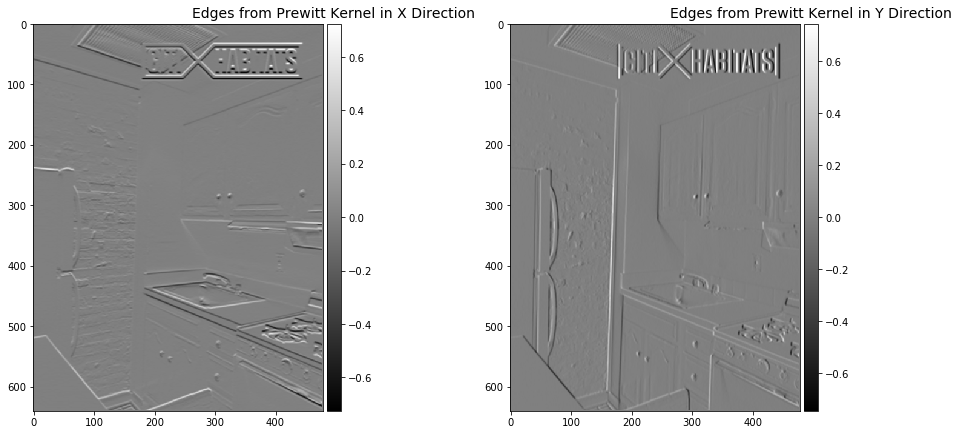

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(12,12))
# plot horizontal edges
plt.subplot(121)
imshow(edges_prewitt_horizontal, cmap='gray')
plt.title("Edges from Prewitt Kernel in X Direction", fontsize=14)
# plot vertical edges
plt.subplot(122)
imshow(edges_prewitt_vertical, cmap='gray')
plt.title("Edges from Prewitt Kernel in Y Direction", fontsize=14)

In [75]:
# run Prewitt Kernel on all the images grouped by foulders
# load images per folder
path = 'images_sample/images_sample'
files = os.listdir(path)
edges_list=[]
for file in files:
    subpath = os.path.join(path, file)
    if os.path.isdir(subpath):
        images = os.listdir(subpath)
        edges_per_listing = []
        for image in images:
            image_path = os.path.join(subpath, image)
            image = imread(image_path, as_gray=True)
            edges_prewitt_horizontal, edges_prewitt_vertical = edges_prewitt(image)
            edges_per_listing.append(edges)
        edges_list.append(edges_per_listing)

In [76]:
# result in 2-dimential table
# [indexes] are the folder number, [columns] are the image number. 
# Number of images in a folder == Number of column not equal to None
edges_frame = pd.DataFrame(edges_list)
edges_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None,None
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None,None
96,None,None,None,None,None,None,None,None,None,None,None,None,None,None
97,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None
98,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",None,None,None,None,None,None,None,None,None,None,None,None


### Find Primary Colors

In [119]:
from sklearn.cluster import KMeans
import utils
import cv2

In [125]:
def find_primary_colors(image):
    
    # reshape the image into a list of RBG pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # KMeans clustering with number of clusters = 3
    clt = KMeans(n_clusters = 3)
    clt.fit(image)
    
    # computer relative frequency for each cluster
    hist = centroid_histogram(clt)
    

    
    return (np.int_(clt.cluster_centers_), np.around(hist,decimals=2))

In [126]:
def centroid_histogram(clt):
    # grab the number of different clusters and 
    # create a histogram based on the number of 
    # pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    
    # normalize the histogram 
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

In [12]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
             color.astype("uint8").tolist(), -1)
        startX = endX
        
    return bar

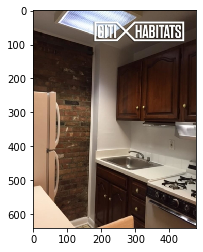

In [128]:
image_path = 'images_sample/images_sample/6812266/6812266_644f7c5ab1c382547e07043751a6df87.jpg'
image = imread(image_path)
plt.figure()
plt.imshow(image)

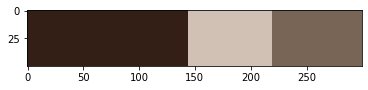

In [129]:
[cluster_centers, hist] = find_primary_colors(image)
bar = plot_colors(hist, cluster_centers)

# show the results
plt.figure()
plt.imshow(bar)
plt.show()

In [130]:
color_frame = pd.DataFrame(cluster_centers, columns=["R", "B", "G"])
hist_frame = pd.DataFrame(hist, columns=["Relative Frequency"])
frame = color_frame.join(hist_frame)
frame

,R,B,G,Relative Frequency
0,51,31,22,0.48
1,208,193,180,0.25
2,120,101,85,0.27


In [131]:
# load images per folder
path = 'images_sample/images_sample'
files = os.listdir(path)
pcolor_list=[]
rf_list = []
for file in files:
    subpath = os.path.join(path, file)
    if os.path.isdir(subpath):
        images = os.listdir(subpath)
        pcolor_per_listing = []
        rf_per_listing = []
        for image in images:
            image_path = os.path.join(subpath, image)
            image = imread(image_path)
            cluster_centers, hist = find_primary_colors(image)
            pcolor_per_listing.append(cluster_centers)
            rf_per_listing.append(hist)
        pcolor_list.append(pcolor_per_listing)
        rf_list.append(rf_per_listing)

In [133]:
pcolor_frame = pd.DataFrame(pcolor_list)
pcolor_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"[[160, 160, 159], [224, 224, 224], [94, 88, 72]]","[[167, 162, 159], [97, 81, 69], [216, 217, 221]]","[[163, 163, 162], [206, 209, 207], [119, 119, ...","[[220, 224, 229], [150, 115, 88], [181, 177, 1...","[[119, 98, 76], [213, 214, 214], [171, 158, 145]]",None,None,None,None,None,None,None,None,None
1,"[[207, 209, 211], [102, 92, 77], [177, 166, 145]]","[[135, 149, 169], [65, 60, 56], [207, 211, 215]]","[[252, 252, 252], [5, 5, 5], [131, 131, 131]]","[[187, 183, 175], [76, 60, 50], [145, 131, 106]]",None,None,None,None,None,None,None,None,None,None
2,"[[77, 49, 30], [203, 195, 182], [144, 122, 100]]","[[139, 125, 103], [229, 235, 232], [94, 81, 63]]","[[109, 101, 90], [217, 233, 242], [139, 142, 1...","[[219, 224, 215], [142, 129, 104], [86, 73, 54]]","[[214, 233, 237], [106, 91, 68], [207, 180, 127]]","[[226, 211, 200], [157, 146, 157], [131, 71, 35]]",None,None,None,None,None,None,None,None
3,"[[140, 134, 127], [223, 224, 226], [65, 56, 49]]","[[207, 179, 145], [251, 251, 250], [94, 72, 57]]","[[145, 141, 133], [215, 213, 207], [54, 56, 52]]","[[121, 111, 103], [211, 212, 214], [63, 53, 45]]","[[34, 33, 35], [184, 180, 182], [114, 112, 116]]",None,None,None,None,None,None,None,None,None
4,"[[151, 158, 163], [59, 54, 42], [102, 103, 98]]","[[124, 108, 87], [82, 64, 42], [209, 209, 207]]",None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[[105, 84, 56], [183, 207, 217], [130, 123, 113]]","[[149, 142, 130], [194, 189, 177], [76, 69, 59]]","[[135, 109, 80], [202, 204, 201], [81, 51, 25]]","[[217, 210, 196], [64, 57, 52], [158, 149, 133]]",None,None,None,None,None,None,None,None,None,None
96,None,None,None,None,None,None,None,None,None,None,None,None,None,None
97,"[[171, 169, 173], [105, 92, 82], [144, 136, 128]]","[[176, 162, 150], [148, 122, 98], [213, 208, 2...","[[198, 196, 198], [57, 51, 51], [144, 118, 91]]","[[128, 111, 97], [152, 149, 150], [221, 225, 2...","[[117, 97, 81], [201, 195, 193], [171, 155, 139]]","[[152, 143, 129], [175, 167, 154], [87, 71, 50]]",None,None,None,None,None,None,None,None
98,"[[187, 147, 125], [46, 38, 38], [234, 224, 222]]","[[228, 226, 225], [185, 166, 149], [142, 92, 49]]",None,None,None,None,None,None,None,None,None,None,None,None


In [135]:
rf_frame = pd.DataFrame(rf_list)
rf_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"[0.54, 0.38, 0.08]","[0.46, 0.13, 0.41]","[0.38, 0.39, 0.22]","[0.34, 0.25, 0.41]","[0.12, 0.59, 0.29]",None,None,None,None,None,None,None,None,None
1,"[0.25, 0.22, 0.53]","[0.31, 0.4, 0.29]","[0.86, 0.1, 0.04]","[0.62, 0.15, 0.23]",None,None,None,None,None,None,None,None,None,None
2,"[0.08, 0.58, 0.34]","[0.38, 0.24, 0.38]","[0.6, 0.11, 0.29]","[0.19, 0.4, 0.41]","[0.1, 0.77, 0.13]","[0.4, 0.47, 0.14]",None,None,None,None,None,None,None,None
3,"[0.64, 0.2, 0.16]","[0.68, 0.22, 0.1]","[0.46, 0.24, 0.3]","[0.55, 0.18, 0.27]","[0.18, 0.52, 0.3]",None,None,None,None,None,None,None,None,None
4,"[0.11, 0.45, 0.44]","[0.19, 0.73, 0.08]",None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[0.47, 0.15, 0.38]","[0.36, 0.54, 0.1]","[0.52, 0.24, 0.24]","[0.37, 0.21, 0.43]",None,None,None,None,None,None,None,None,None,None
96,None,None,None,None,None,None,None,None,None,None,None,None,None,None
97,"[0.38, 0.29, 0.33]","[0.57, 0.32, 0.11]","[0.28, 0.33, 0.39]","[0.5, 0.41, 0.1]","[0.31, 0.26, 0.43]","[0.39, 0.46, 0.14]",None,None,None,None,None,None,None,None
98,"[0.61, 0.27, 0.11]","[0.29, 0.39, 0.31]",None,None,None,None,None,None,None,None,None,None,None,None


#### To use the above tables, we can extract values in the same place of the 2 tables, which is a pair of (color, relative frequency), and use the function _plot_colors_ to see the primary colors of this image

In [ ]:
bar1 = plot_colors(rf_frame.iloc[4][2], pcolor_frame.iloc[4][2])

# show the results
plt.figure()
plt.imshow(bar)
plt.show()